<a href="https://colab.research.google.com/github/ianbennett41430/ICP8/blob/main/ICP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Denoising AutoEncoder

In [43]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#this shows the prediction for the model results
autoencoder.evaluate(x_test)
pred = autoencoder.predict(x_test)
print("The prediction is:")
print(pred)
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


313/313 [==============================] - 1s 2ms/step
The prediction is:
[[0.48446137 0.50017494 0.5042935  ... 0.5155505  0.49894118 0.4896511 ]
 [0.4501582  0.5145111  0.52502537 ... 0.54411155 0.52123386 0.49562028]
 [0.45589992 0.48015675 0.52372056 ... 0.55189437 0.5517728  0.49220905]
 ...
 [0.48499152 0.47599375 0.5161267  ... 0.5195368  0.5055676  0.49412322]
 [0.42976758 0.46046498 0.52489054 ... 0.5713521  0.53670233 0.47376367]
 [0.48551646 0.511043   0.50924903 ... 0.51844114 0.5149467  0.48381016]]
Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.6972 - val_loss: 0.6970
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6969 - val_loss: 0.6968
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6967 - val_loss: 0.6966
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6965 - val_loss: 0.6963
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.696

AutoEncoder

313/313 [==============================] - 1s 2ms/step
The prediction is:
[[0.4664748  0.47264978 0.47465384 ... 0.4962867  0.4923614  0.50574386]
 [0.4354437  0.44747818 0.51305187 ... 0.5228154  0.4832473  0.44466886]
 [0.50439656 0.47814077 0.4758206  ... 0.5215623  0.5148557  0.468885  ]
 ...
 [0.42916727 0.4550179  0.52465236 ... 0.5742365  0.53702337 0.46630934]
 [0.4530804  0.4692596  0.48122698 ... 0.54230887 0.5349748  0.47746035]
 [0.46169615 0.4738193  0.4944614  ... 0.5108617  0.5127601  0.50547665]]
Epoch 1/5
235/235 [==============================] - 4s 12ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 4/5
235/235 [==============================] - 2s 9ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 5/5
235/235 [==============================] - 2s 9ms/step - loss: 0.6935 - v

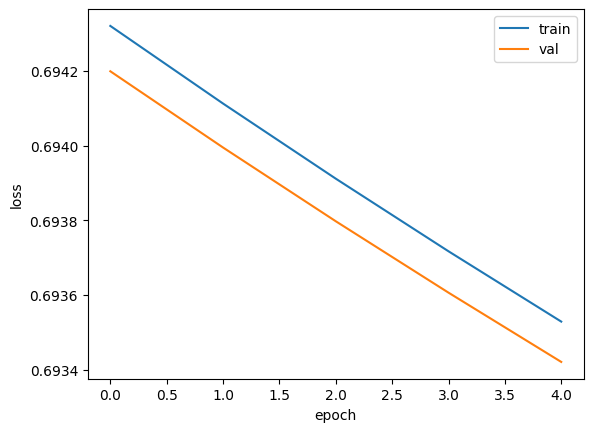

In [42]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
#this shows the prediction for the model results
autoencoder.evaluate(x_test)
pred = autoencoder.predict(x_test)
print("The prediction is:")
print(pred)

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# plots the performance of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

